In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from statistics import mode
import pickle
from nltk.classify import ClassifierI
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
import glob
from sklearn.svm import LinearSVC

In [6]:
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('CogData/Room/critic.txt')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences

In [18]:
all_words=[]
for w in movie_reviews.words():
    all_words.append(w.lower())


all_words=nltk.FreqDist(all_words)

documents=[]

word_features=list(all_words.keys())

word_features=nltk.pos_tag(word_features)

allowed_pos=set(["JJ", "JJR","JJS","RB","RBR","RBS"])

word_features=[word[0] for word in word_features
               if word[1] in allowed_pos]



[u'comically',
 u'disobeying',
 u'rickman',
 u'slothful',
 u'stipulate',
 u'unsworth',
 u'wooden',
 u'stereotypical',
 u'inanimate',
 u'fonzie',
 u'joely',
 u'numeral',
 u'jubilantly',
 u'rocque',
 u'natured',
 u'neurologist',
 u'spotty',
 u'appropriately',
 u'unsinkable',
 u'stern',
 u'cannibal',
 u'therefore',
 u'mystic',
 u'yahoo',
 u'exuberantly',
 u'======',
 u'primeval',
 u'morally',
 u'soundbite',
 u'unjust',
 u'dishearteningly',
 u'absolute',
 u'copious',
 u'wrong',
 u'cerebrally',
 u'colorfully',
 u'glenne',
 u'crackin',
 u'nonsensical',
 u'snugly',
 u'wickedly',
 u'fit',
 u'fix',
 u'fin',
 u'multidimensional',
 u'arrow',
 u'ingrid',
 u'oprah',
 u'scrumptiously',
 u'indiscretion',
 u'mason',
 u'outburst',
 u'anonymously',
 u'universally',
 u'chlorine',
 u'sickeningly',
 u'mackey',
 u'loudness',
 u'wiseguys',
 u'sooty',
 u'lyndon',
 u'positively',
 u'ahmed',
 u'idly',
 u'idle',
 u'friend',
 u'longo',
 u'urinate',
 u'courier',
 u'uncouth',
 u'limitless',
 u'cinematic',
 u'mouth'

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ranjan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
word_features = word_features[0:1000]

In [23]:
word_features

[u'comically',
 u'disobeying',
 u'rickman',
 u'slothful',
 u'stipulate',
 u'unsworth',
 u'wooden',
 u'stereotypical',
 u'inanimate',
 u'fonzie',
 u'joely',
 u'numeral',
 u'jubilantly',
 u'rocque',
 u'natured',
 u'neurologist',
 u'spotty',
 u'appropriately',
 u'unsinkable',
 u'stern',
 u'cannibal',
 u'therefore',
 u'mystic',
 u'yahoo',
 u'exuberantly',
 u'======',
 u'primeval',
 u'morally',
 u'soundbite',
 u'unjust',
 u'dishearteningly',
 u'absolute',
 u'copious',
 u'wrong',
 u'cerebrally',
 u'colorfully',
 u'glenne',
 u'crackin',
 u'nonsensical',
 u'snugly',
 u'wickedly',
 u'fit',
 u'fix',
 u'fin',
 u'multidimensional',
 u'arrow',
 u'ingrid',
 u'oprah',
 u'scrumptiously',
 u'indiscretion',
 u'mason',
 u'outburst',
 u'anonymously',
 u'universally',
 u'chlorine',
 u'sickeningly',
 u'mackey',
 u'loudness',
 u'wiseguys',
 u'sooty',
 u'lyndon',
 u'positively',
 u'ahmed',
 u'idly',
 u'idle',
 u'friend',
 u'longo',
 u'urinate',
 u'courier',
 u'uncouth',
 u'limitless',
 u'cinematic',
 u'mouth'

In [25]:
for w in glob.glob("aclImdb/train/pos/*.txt"):
    fileread=open(w,"r",encoding="utf8")
    features={}
    wordsinfile=set(word_tokenize(fileread.read()))
    for word in word_features:
        features[word]=(word in wordsinfile)
        
    documents.append((features,"pos"))
    fileread.close()

In [26]:
documents

[]

In [27]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

CogData/Dangal/
CogData/Dangal/r16.txt
('Neutral:', 0.649, 'Positive:', 0.175, 'Negative:', 0.175)
CogData/Dangal/r18.txt
('Neutral:', 0.263, 'Positive:', 0.737, 'Negative:', 0.0)
CogData/Dangal/r20.txt
('Neutral:', 1.0, 'Positive:', 0.0, 'Negative:', 0.0)
CogData/Dangal/r13.txt
('Neutral:', 0.714, 'Positive:', 0.0, 'Negative:', 0.286)
CogData/Dangal/r12.txt
('Neutral:', 0.794, 'Positive:', 0.206, 'Negative:', 0.0)
CogData/Dangal/r19.txt
('Neutral:', 0.9215, 'Positive:', 0.0, 'Negative:', 0.0785)
CogData/Dangal/r5.txt
('Neutral:', 0.902, 'Positive:', 0.098, 'Negative:', 0.0)
CogData/Dangal/r24.txt
('Neutral:', 0.233, 'Positive:', 0.0, 'Negative:', 0.767)
CogData/Dangal/r23.txt
('Neutral:', 0.609, 'Positive:', 0.0, 'Negative:', 0.391)
CogData/Dangal/r21.txt
('Neutral:', 0.417, 'Positive:', 0.583, 'Negative:', 0.0)
CogData/Dangal/r14.txt
('Neutral:', 1.0, 'Positive:', 0.0, 'Negative:', 0.0)
CogData/Dangal/r3.txt
('Neutral:', 0.625, 'Positive:', 0.375, 'Negative:', 0.0)
CogData/Dangal/r25

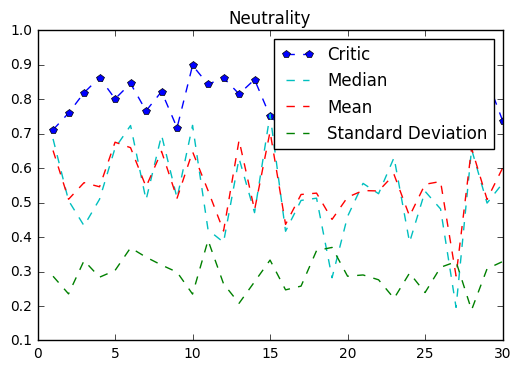

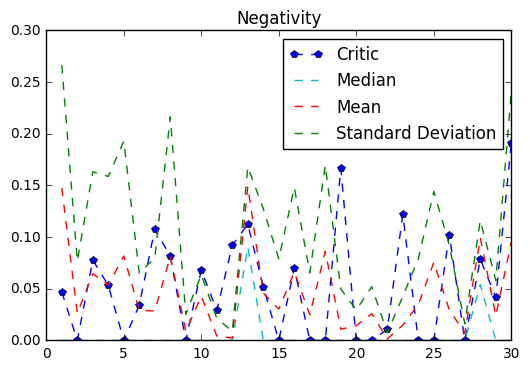

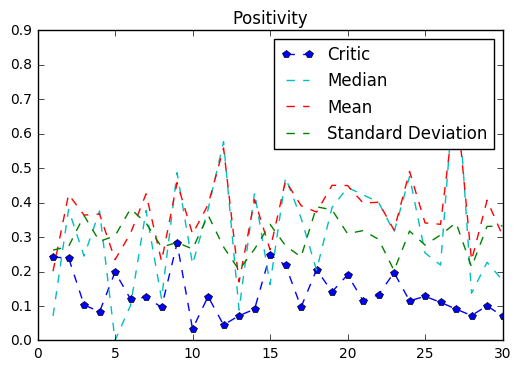

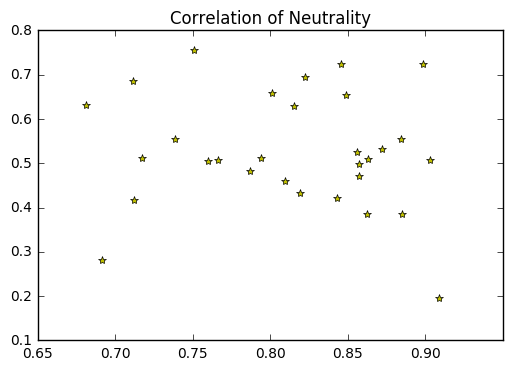

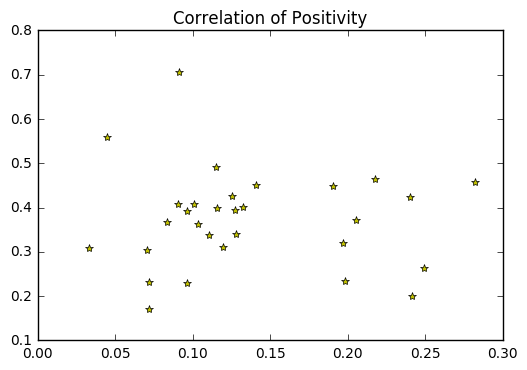

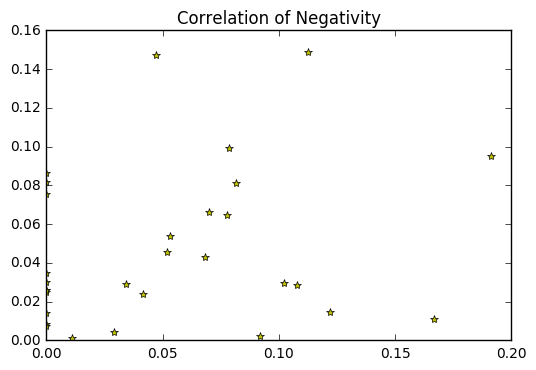

In [39]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import glob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import statistics
import numpy as np
import matplotlib.pyplot as plt
import io



                           
                           
movies_count=0                          
movie_critic_neu=[]
movie_critic_neg=[]
movie_critic_pos=[]
movie_median_neu=[]
movie_median_neg=[]
movie_median_pos=[]
movie_mean_neu=[]
movie_mean_neg=[]
movie_mean_pos=[]
movie_std_neu=[]
movie_std_neg=[]
movie_std_pos=[]
for root in glob.glob("CogData/*/"):
    print(root)
    movies_count+=1
    movieneg=[]
    moviepos=[]
    movieneu=[]
    for path in glob.glob(root+"*.txt"):
        print(path)
        testfile=io.open(path,"r", encoding='utf-8')

        sentencesintest=sent_tokenize(testfile.readline())
        sid = SentimentIntensityAnalyzer()
        negval=0
        posval=0
        neuval=0
        for sentence in sentencesintest:
                ss=sid.polarity_scores(sentence)
                negval+=ss["neg"]
                posval+=ss["pos"]
                neuval+=ss["neu"]
                
        if(len(sentencesintest) != 0):
            negval/=len(sentencesintest)
        else:
            negval = 0
        if(len(sentencesintest) != 0):
            posval/=len(sentencesintest)
        else:
            posval = 0
        if(len(sentencesintest) != 0):
            neuval/=len(sentencesintest)
        else:
            neuval = 0
                
        print("Neutral:",neuval,"Positive:",posval,"Negative:",negval )
        if (path==root+"critic.txt"):
            movie_critic_neu.append(neuval)
            movie_critic_neg.append(negval)
            movie_critic_pos.append(posval)
        else:
            movieneg.append(negval)
            movieneu.append(neuval)
            moviepos.append(posval)
        testfile.close()

    print("Median Neutral:", statistics.median(movieneu),
      "Positive:",statistics.median(moviepos),
      "Negative:", statistics.median(movieneg))
    print("Mean Neutral:", statistics.mean(movieneu),
      "Positive:",statistics.mean(moviepos),
      "Negative:", statistics.mean(movieneg))
    print("Standard Deviation Neutral:", statistics.stdev(movieneu),
        "Positive:",statistics.stdev(moviepos),
        "Negative:", statistics.stdev(movieneg))
    movie_median_neu.append(statistics.median(movieneu))
    movie_median_neg.append(statistics.median(movieneg))
    movie_median_pos.append(statistics.median(moviepos))
    movie_mean_neu.append(statistics.mean(movieneu))
    movie_mean_neg.append(statistics.mean(movieneg))
    movie_mean_pos.append(statistics.mean(moviepos))
    movie_std_neu.append(statistics.stdev(movieneu))
    movie_std_neg.append(statistics.stdev(movieneg))
    movie_std_pos.append(statistics.stdev(moviepos))

t = np.arange(1, movies_count+1, 1)
line1, = plt.plot(t,movie_critic_neu,"p--",label="Critic")
line2, =plt.plot(t,movie_median_neu,"c--",label="Median")
line3, =plt.plot(t,movie_mean_neu,"r--",label="Mean")
line4, =plt.plot(t,movie_std_neu,"g--",label="Standard Deviation")
plt.title("Neutrality")
plt.legend(handles=[line1,line2,line3,line4])
plt.show()

##print(t)
line1, = plt.plot(t,movie_critic_neg,"p--",label="Critic")
line2, =plt.plot(t,movie_median_neg,"c--",label="Median")
line3, =plt.plot(t,movie_mean_neg,"r--",label="Mean")
line4, =plt.plot(t,movie_std_neg,"g--",label="Standard Deviation")
plt.title("Negativity")
plt.legend(handles=[line1,line2,line3,line4])
plt.show()

line1, = plt.plot(t,movie_critic_pos,"p--",label="Critic")
line2, =plt.plot(t,movie_median_pos,"c--",label="Median")
line3, =plt.plot(t,movie_mean_pos,"r--",label="Mean")
line4, =plt.plot(t,movie_std_pos,"g--",label="Standard Deviation")
plt.title("Positivity")
plt.legend(handles=[line1,line2,line3,line4])
plt.show()

plt.title("Correlation of Neutrality")
plt.plot(movie_critic_neu,movie_median_neu,"y*")
plt.show()


plt.title("Correlation of Positivity")
plt.plot(movie_critic_pos,movie_mean_pos,"y*")
plt.show()

plt.title("Correlation of Negativity")
plt.plot(movie_critic_neg,movie_mean_neg,"y*")
plt.show()

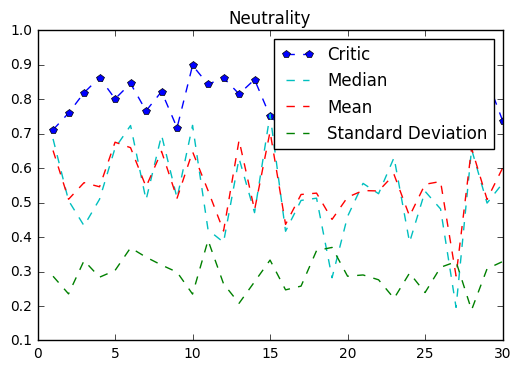

In [40]:
t = np.arange(1, movies_count+1, 1)
line1, = plt.plot(t,movie_critic_neu,"p--",label="Critic")
line2, =plt.plot(t,movie_median_neu,"c--",label="Median")
line3, =plt.plot(t,movie_mean_neu,"r--",label="Mean")
line4, =plt.plot(t,movie_std_neu,"g--",label="Standard Deviation")
plt.title("Neutrality")
plt.legend(handles=[line1,line2,line3,line4])
plt.show()

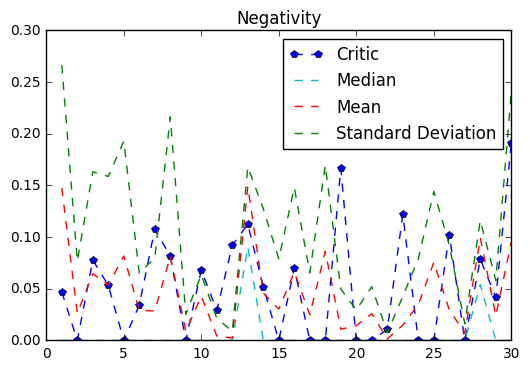

In [41]:
line1, = plt.plot(t,movie_critic_neg,"p--",label="Critic")
line2, =plt.plot(t,movie_median_neg,"c--",label="Median")
line3, =plt.plot(t,movie_mean_neg,"r--",label="Mean")
line4, =plt.plot(t,movie_std_neg,"g--",label="Standard Deviation")
plt.title("Negativity")
plt.legend(handles=[line1,line2,line3,line4])
plt.show()

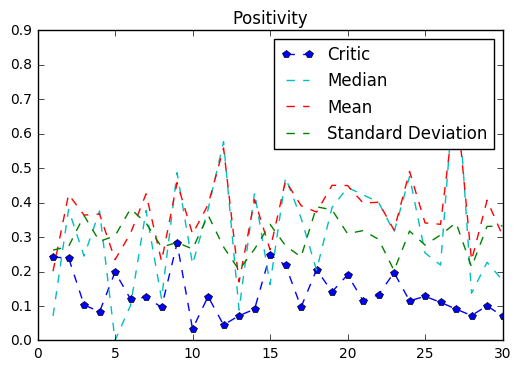

In [42]:

line1, = plt.plot(t,movie_critic_pos,"p--",label="Critic")
line2, =plt.plot(t,movie_median_pos,"c--",label="Median")
line3, =plt.plot(t,movie_mean_pos,"r--",label="Mean")
line4, =plt.plot(t,movie_std_pos,"g--",label="Standard Deviation")
plt.title("Positivity")
plt.legend(handles=[line1,line2,line3,line4])
plt.show()

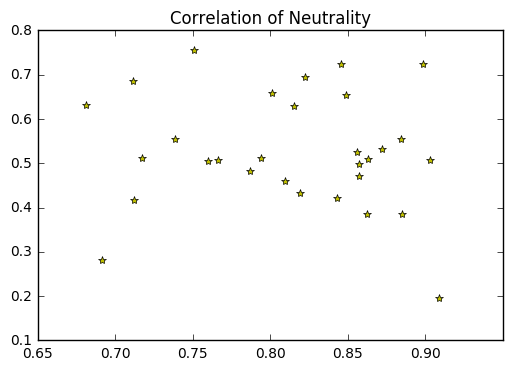

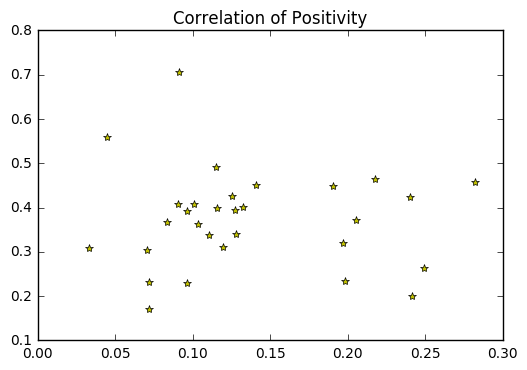

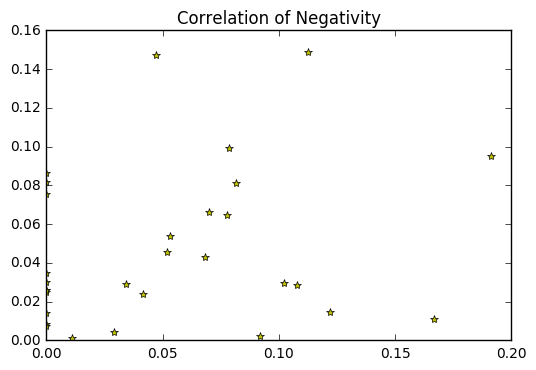

In [43]:
plt.title("Correlation of Neutrality")
plt.plot(movie_critic_neu,movie_median_neu,"y*")
plt.show()


plt.title("Correlation of Positivity")
plt.plot(movie_critic_pos,movie_mean_pos,"y*")
plt.show()

plt.title("Correlation of Negativity")
plt.plot(movie_critic_neg,movie_mean_neg,"y*")
plt.show()